In [ ]:
! pip install --upgrade pandas tensorflow_gpu ktrain

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.4)
     |████████████████████████████████| 320.4MB 54kB/s 
     |████████████████████████████████| 25.3MB 142kB/s 
     |████████████████████████████████| 983kB 53.4MB/s 
     |████████████████████████████████| 266kB 50.7MB/s 
     |████████████████████████████████| 1.3MB 51.4MB/s 
     |████████████████████████████████| 471kB 46.3MB/s 
     |████████████████████████████████| 890kB 52.0MB/s 
     |████████████████████████████████| 2.9MB 52.7MB/s 
     |████████████████████████████████| 1.1MB 49.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.0-cp36-none-any.whl size=25274500 sha256=0c39e568ff0d83a29a4319bcc06c20b11d737e36bfe643b56e623f85c5fbd429
  Stored in directory: /root/.cache/pip/wheels/5c/73/05/f36d0027bb6575384e21506dbba8db36a7825f15a24f09b2d5
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=665b627319bbe41d43752585c407405eb7308e30cab0b5e8ea

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


**RESTART RUNTIME**

In [ ]:
# ! cp ./drive/My\ Drive/mlin/hindicorpus/hi_3500.csv ./

In [ ]:
import pandas as pd 

df = pd.read_csv("./train_data.csv", header=0, names=['review', 'sentiment'])
df.head()

,review,sentiment
1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive"
2,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile
4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive"
5,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], random_state=42)

In [ ]:
print(len(set(y_train.values)))

16


ktrain code below based on https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed

# Hindi-BERT

In [ ]:
import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-bert", maxlen=500, class_names=list(set(y_train.values)))

In [ ]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 30
	95percentile : 57
	99percentile : 84


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:588: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False


In [ ]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: hi
test sequence lengths:
	mean : 30
	95percentile : 56
	99percentile : 84


In [ ]:
model = t.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=8)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
268/268 [==============================] - 115s 428ms/step - loss: 2.7641 - accuracy: 0.1147
Epoch 2/6
268/268 [==============================] - 117s 437ms/step - loss: 2.5746 - accuracy: 0.5175
Epoch 3/6
268/268 [==============================] - 117s 438ms/step - loss: 1.3895 - accuracy: 0.5932
Epoch 4/6
268/268 [==============================] - 118s 439ms/step - loss: 1.6304 - accuracy: 0.5318
Epoch 5/6
268/268 [==============================] - 117s 438ms/step - loss: 1.8979 - accuracy: 0.5072
Epoch 6/6
268/268 [==============================] - 118s 439ms/step - loss: 2.0503 - accuracy: 0.4741


done.
Visually inspect loss plot and select learning rate associated with falling loss


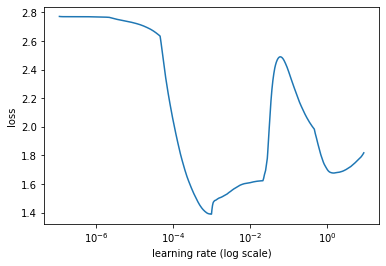

In [ ]:
learner.lr_find(show_plot=True, max_epochs=6)

If you pick a bad learning rate below, learner will remember the bad training. I've purposely included the `model =` and `learner =` lines in this cell to reset you

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=8)
learner.fit_onecycle(5e-5, 50)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/50
269/269 [==============================] - 132s 490ms/step - loss: 2.7013 - accuracy: 0.4108 - val_loss: 2.6060 - val_accuracy: 0.5321
Epoch 2/50
269/269 [==============================] - 130s 483ms/step - loss: 2.4808 - accuracy: 0.5326 - val_loss: 2.2855 - val_accuracy: 0.5321
Epoch 3/50
269/269 [==============================] - 130s 484ms/step - loss: 2.1174 - accuracy: 0.5326 - val_loss: 1.8764 - val_accuracy: 0.5321
Epoch 4/50
269/269 [==============================] - 130s 484ms/step - loss: 1.7313 - accuracy: 0.5326 - val_loss: 1.5116 - val_accuracy: 0.5321
Epoch 5/50
269/269 [==============================] - 130s 484ms/step - loss: 1.4201 - accuracy: 0.5375 - val_loss: 1.3015 - val_accuracy: 0.5321
Epoch 6/50
269/269 [==============================] - 130s 485ms/step - loss: 1.2355 - accuracy: 0.6034 - val_loss: 1.1544 - val_accuracy: 0.6453
Epoch 7/50
269/269 [==============================] - 130s 48

In [ ]:
# learner.autofit(3e-4, 5)
#predictor.save('/tmp/my_predictor')

NameError: ignored

In [ ]:
learner.view_top_losses(n=1, preproc=t)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
df = pd.read_csv("./validation_data.csv", header=0, names=['review', 'sentiment'])
df.head()
val_preds = predictor.predict(df['review'].to_numpy())

In [ ]:
from sklearn.metrics import f1_score
f1_score(df['sentiment'], val_preds, average="micro")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df['sentiment'], val_preds)

# Hindi-TPU-Electra

In [ ]:
import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-tpu-electra", maxlen=512, class_names=list(set(y_train.values)))

In [ ]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 30
	95percentile : 56
	99percentile : 85


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:588: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False


In [ ]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: hi
test sequence lengths:
	mean : 30
	95percentile : 57
	99percentile : 83


In [ ]:
model = t.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=8)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
537/537 [==============================] - 535s 997ms/step - loss: 2.4025 - accuracy: 0.4022
Epoch 2/2
537/537 [==============================] - 533s 992ms/step - loss: 2.7131 - accuracy: 0.4774


done.
Visually inspect loss plot and select learning rate associated with falling loss


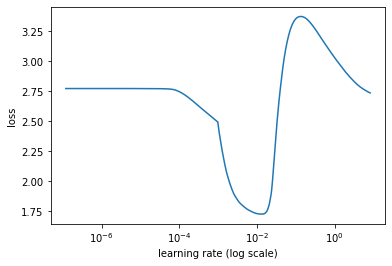

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=8)
learner.fit_onecycle(5e-5, 5)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/5
232/537 [===========>..................] - ETA: 5:03 - loss: 2.7640 - accuracy: 0.4763

KeyboardInterrupt: ignored